In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.toy_text.frozen_lake import generate_random_map
import sys
sys.path.append('../')
from value_iteration.value_iteration import value_iteration
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [2]:
np.random.seed(1)

desc= [
    "SFFHHFFF",
    "FFFFHFFF",
    "FFFFFFFF",
    "FFHFFHFH",
    "FFFFHFFF",
    "FHFFFFHH",
    "FFFFFFFF",
    "FFFHHFFG",

]

In [3]:
def run_multiple_value_iterations(env_name, gamma=0.99, theta=1e-8, num_runs=10):
    all_avg_rewards = []
    games_won = []
    policies = []
    values = []
    for _ in range(num_runs):
        env = gym.make(env_name, desc=desc, render_mode=None, is_slippery=False)
        env.reset(seed=1)
        V, avg_rewards, games_won_count, _, policy = value_iteration(env, gamma, theta)
        all_avg_rewards.append(avg_rewards)
        games_won.append(games_won_count)
        policies.append(policy)
        values.append(V)
    return np.array(all_avg_rewards), np.array(games_won), policies, np.mean(values, axis=0)

def plot_avg_rewards(all_avg_rewards, games_won):
    avg_rewards_mean = np.mean(all_avg_rewards, axis=0)
    avg_rewards_std = np.std(all_avg_rewards, axis=0)
    avg_games_won_mean = np.mean(games_won, axis=0)
    avg_games_won_std = np.std(games_won, axis=0)
    iterations = np.arange(10, 10 * len(avg_rewards_mean) + 1, 10)
    plt.errorbar(iterations, avg_rewards_mean, yerr=avg_rewards_std, fmt='-o', capsize=5, label='Avg Reward')
    plt.xlabel('Iterations')
    plt.ylabel('Average Reward')
    plt.title('Value Iteration: Avg Reward with Error Bars')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.errorbar(iterations, avg_games_won_mean, yerr=avg_games_won_std, fmt='-o', capsize=5, label='Avg Games Won')
    plt.xlabel('Iterations')
    plt.ylabel('Average Games Won')
    plt.title('Value Iteration: Average Games Won with Error Bars')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_value_function_heatmap(V, env_shape, title='Value Function Heatmap'):
    # Reshape V to match the environment shape
    V_reshaped = np.reshape(V, env_shape)
    colors = [(1, 0, 0), (1, 1, 1), (0, 1, 0)]
    cmap = LinearSegmentedColormap.from_list('red_green', colors, N=256)
    plt.figure(figsize=(6, 6))
    sns.heatmap(V_reshaped, annot=True, cmap=cmap, cbar=True, square=True, vmin=0, vmax=1)
    plt.title(title)
    plt.show()

c:\Users\anant\.conda\envs\gpu-env\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Iteration 0: Avg Reward: 0.0000, Games Won: 0, Avg Steps: 100.00
Iteration 10: Avg Reward: 0.0000, Games Won: 0, Avg Steps: 100.00
Iteration 20: Avg Reward: 0.8775, Games Won: 500, Avg Steps: 14.00
Iteration 30: Avg Reward: 0.8775, Games Won: 500, Avg Steps: 14.00
Iteration 40: Avg Reward: 0.8775, Games Won: 500, Avg Steps: 14.00
Iteration 50: Avg Reward: 0.8775, Games Won: 500, Avg Steps: 14.00
Iteration 60: Avg Reward: 0.8775, Games Won: 500, Avg Steps: 14.00
Iteration 70: Avg Reward: 0.8775, Games Won: 500, Avg Steps: 14.00
Iteration 80: Avg Reward: 0.8775, Games Won: 500, Avg Steps: 14.00
Iteration 90: Avg Reward: 0.8775, Games Won: 500, Avg Steps: 14.00
Iteration 100: Avg Reward: 0.8775, Games Won: 500, Avg Steps: 14.00
Iteration 110: Avg Reward: 0.8775, Games Won: 500, Avg Steps: 14.00
Iteration 120: Avg Reward: 0.8775, Games Won: 500, Avg Steps: 14.00
Iteration 130: Avg Reward: 0.8775, Games Won: 500, Avg Steps: 14.00
Iteration 140: Avg Reward: 0.8775, Games Won: 500, Avg Steps:

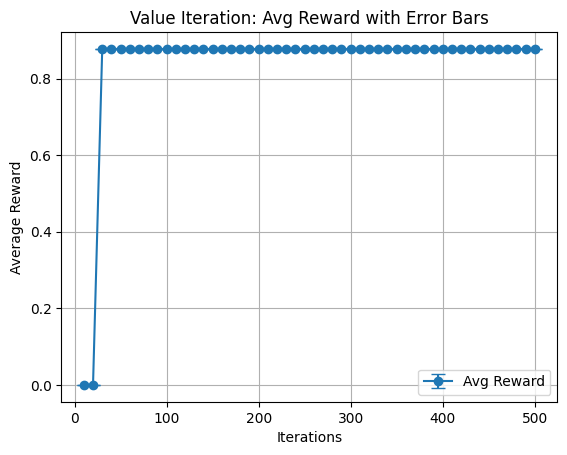

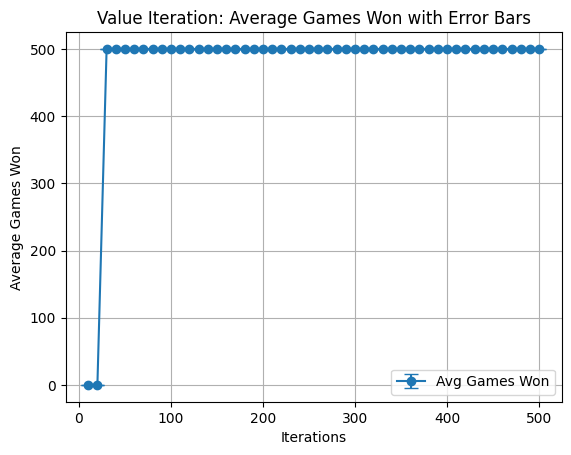

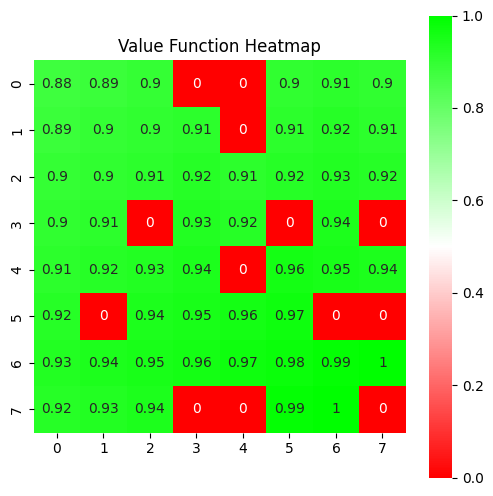

In [4]:
all_avg_rewards, games_won, policies, values = run_multiple_value_iterations('FrozenLake-v1', gamma=0.99, theta=1e-8, num_runs=2)
plot_avg_rewards(all_avg_rewards, games_won)
plot_value_function_heatmap(values, (8, 8))

In [5]:
import imageio


def display_avg_rewards_and_play_game(all_avg_rewards, games_won, policies, env_name):
    avg_games_won_mean = np.mean(games_won, axis=0)
    avg_rewards_mean = np.mean(all_avg_rewards, axis=0)
    
    # print("Average Games Won:", avg_games_won_mean)
    # print("Average Rewards:", avg_rewards_mean)
    
    # Ask the user to select a policy number
    # policy_number = int(input("Enter a policy number (0 to 9): "))
    policy_number = 1
    # Check if the input is within valid range
    if policy_number < 0 or policy_number > 9:
        print("Invalid policy number! Please enter a number between 0 and 9.")
        return
    
    # Use the selected policy to play the game
    env = gym.make(env_name, desc=desc, render_mode="rgb_array", is_slippery=False)
    policy = policies[policy_number]
    
    state, _ = env.reset()  # Initialize the game
    done = False
    frames = []
    
    while not done:
        action = np.argmax(policy[state])
        state, reward, done, truncated, info = env.step(action)
        frame = env.render()  # Render the environment frame as an image (rgb_array mode)
        frames.append(frame)

    env.close()

    gif_filename = 'game_play.gif'
    imageio.mimsave(gif_filename, frames, fps=3, loop=0)  # Save as GIF with 5 frames per second
    print(f"GIF saved as {gif_filename}")


display_avg_rewards_and_play_game(all_avg_rewards, games_won, policies, 'FrozenLake-v1')


c:\Users\anant\.conda\envs\gpu-env\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


GIF saved as game_play.gif
